In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Question 1

In [2]:
# read in diabetic patient dataset
df = pd.read_csv('D1.csv')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51766 non-null object
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
dia

In [3]:
df['gender'].value_counts()


Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64

In [4]:
# map gender into binary variable

gender_binary = {'Female':0, 'Male':1, 'Unknown/Invalid':np.NaN}
df['gender'] = df['gender'].map(gender_binary)



In [5]:
df['gender'].value_counts()


0.0    27718
1.0    24044
Name: gender, dtype: int64

In [6]:
df['change'].value_counts()

Ch    26663
No    25103
Name: change, dtype: int64

In [7]:
# map change into binary variable

change_binary = {'No':0, 'Ch':1}
df['change'] = df['change'].map(change_binary)



In [8]:
df['change'].value_counts()

1    26663
0    25103
Name: change, dtype: int64

In [9]:
df['diabetesMed'].value_counts()

Yes    40984
No     10782
Name: diabetesMed, dtype: int64

In [10]:
# map diabetesMed into binary variable

diabetesMed_binary = {'No':0, 'Yes':1}
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_binary)


In [11]:
df['diabetesMed'].value_counts()

1    40984
0    10782
Name: diabetesMed, dtype: int64

In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51762 non-null float64
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
di

# Question 2

# Statistical Measures

In [13]:
# Descriptive statistic for the NUMBERIC data

df.describe()



,encounter_id,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
count,5.176600e+04,5.176600e+04,51762.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000,51766.000000
mean,2.445955e+08,7.181953e+07,0.464511,1.820287,3.166905,5.201271,4.237337,43.853205,1.308214,16.735850,0.512846,0.269173,0.686879,7.928486,0.515068,0.791717
std,7.941105e+07,3.393915e+07,0.498744,1.211580,4.358440,3.098823,2.870999,19.945471,1.721694,8.063522,1.544866,1.146923,1.320968,1.693707,0.499778,0.406085
min,1.506458e+08,7.290000e+02,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.751287e+08,4.219399e+07,0.000000,1.000000,1.000000,1.000000,2.000000,33.000000,0.000000,11.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000
50%,2.283345e+08,7.037598e+07,0.000000,1.000000,1.000000,7.000000,3.000000,45.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000
75%,2.861807e+08,9.353915e+07,1.000000,3.000000,3.000000,7.000000,6.000000,58.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000
max,4.438672e+08,1.895026e+08,1.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,75.000000,42.000000,76.000000,19.000000,16.000000,1.000000,1.000000


In [14]:
# Looking at unique values in the dataset and see if there is any unusal values

for col in list(df):
    print(col)
    print(df[col].unique())

encounter_id
[150645834 150646782 150659562 ... 443854148 443857166 443867222]
patient_nbr
[ 66173058 104923647  30917367 ... 140199494 120975314 175429310]
race
['Caucasian' 'AfricanAmerican' 'Hispanic' '?' 'Other' 'Asian']
gender
[ 0.  1. nan]
age
['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)' '?']
weight
['?' '[100-125)' '[50-75)' '[75-100)' '[0-25)' '[125-150)' '[25-50)'
 '[150-175)' '[175-200)' '>200']
admission_type_id
[2 3 1 5 6 8 7 4]
discharge_disposition_id
[ 1  2  6  3 22 11  7 23 13  4 15  9 28  5 19  8 25 14 24 27 18]
admission_source_id
[ 1  7  5 17  4  2  3  6  9 10 22 20  8 14 11 25 13]
time_in_hospital
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
payer_code
['?' 'MD' 'BC' 'MC' 'HM' 'CP' 'SP' 'OG' 'UN' 'DM' 'CM' 'PO' 'SI' 'WC' 'CH'
 'OT' 'MP' 'FR']
medical_specialty
['InternalMedicine' '?' 'Cardiology' 'Emergency/Trauma' 'Neurology'
 'Surgery-General' 'Family/GeneralPractice'
 'Surgery-Cardiovascular/Thoracic' 'Surge

In [15]:
# view the number of '?' data

num_missing = (df[['race', 'age', 'weight', 'chlorpropamide', 'payer_code', 'medical_specialty', 
                   'diag_2']] == "?").sum()
print(num_missing)

race                  1016
age                     10
weight               50431
chlorpropamide           9
payer_code            7601
medical_specialty    32203
diag_2                  92
dtype: int64


In [16]:
# 3a) What is the average time stay in hospital of a female patient who was readmitted in less than 30 days?
# 4.524752 days

print(df.groupby(['gender','readmitted'], as_index=False)['time_in_hospital'].mean())
# Q1 mapped 0: Female

   gender readmitted  time_in_hospital
0     0.0        <30          4.524752
1     0.0        >30          4.465249
2     0.0         NO          4.207442
3     1.0        <30          4.482972
4     1.0        >30          4.192097
5     1.0         NO          4.012216


In [17]:
# Q2 part 3(b) which age group has the highest risk of being readmitted within 30 days
# 70-80 has the highest risk

df_readmitted_age_grouped = df.groupby(['age'])['readmitted'].value_counts()
df_readmitted_age_grouped

age       readmitted
?         NO               7
          >30              3
[0-10)    NO              17
          >30              6
[10-20)   NO             132
          >30             76
          <30             15
[20-30)   NO             464
          >30            230
          <30            121
[30-40)   NO            1008
          >30            522
          <30            187
[40-50)   NO            2611
          >30           1537
          <30            471
[50-60)   NO            4789
          >30           2905
          <30            788
[60-70)   NO            6270
          >30           4074
          <30           1274
[70-80)   NO            6770
          >30           4767
          <30           1435
[80-90)   NO            4930
          >30           3611
          <30           1130
[90-100)  NO             940
          >30            483
          <30            193
Name: readmitted, dtype: int64

In [18]:
# Q2 part 3 (c) how many age groups have > 3000 cases of being readmitted
# 4 age groups

filter_readmitted = df[(df['readmitted']=='>30') | (df['readmitted']=='<30')]
readmitted_by_age = filter_readmitted['age'].value_counts()
readmitted_by_age

[70-80)     6202
[60-70)     5348
[80-90)     4741
[50-60)     3693
[40-50)     2008
[30-40)      709
[90-100)     676
[20-30)      351
[10-20)       91
[0-10)         6
?              3
Name: age, dtype: int64

In [19]:
# Q2 part 3 (d) Top 3 race categories according to the number of readmission
# 1st - Caucasian, 2nd - AfricanAmerican, 3rd - Other {NOTE: excluding '?'}

readmitted_by_race = filter_readmitted['race'].value_counts()
readmitted_by_race

Caucasian          19120
AfricanAmerican     3530
?                    367
Other                347
Hispanic             344
Asian                120
Name: race, dtype: int64

# Question 3

## Visualisation on each variable

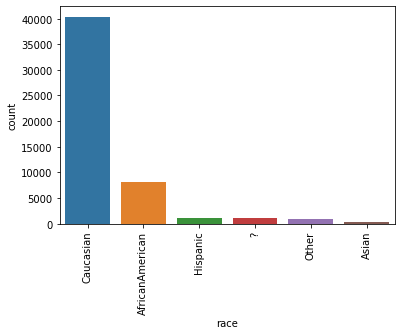

In [20]:
# race
race_plot = sns.countplot(data=df, x='race')
race_plot.set_xticklabels(race_plot.get_xticklabels(),rotation=90)
plt.show()

# missing data with '?', Caucasian is the majority

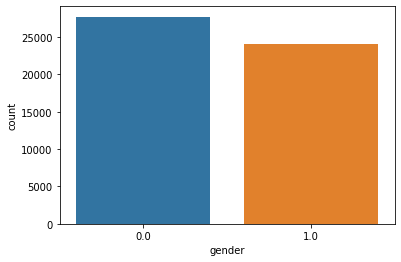

In [21]:
# gender (Female = 0, Male = 1)
gender_plot = sns.countplot(data=df, x='gender')
plt.show()

# Not include missing data with 'nan' in plot, about equal shares in gender

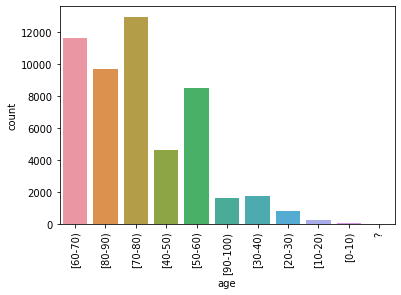

In [22]:
# age
age_plot = sns.countplot(data=df, x='age')
age_plot.set_xticklabels(age_plot.get_xticklabels(),rotation=90)
plt.show()

# missing data with "?", +ive skewed, 40 and above are the majority age group

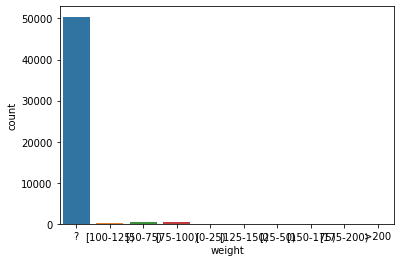

In [23]:
# weight
weight_plot = sns.countplot(data=df, x='weight')
plt.show()

# 50431 records are '?' (97.42% of data)

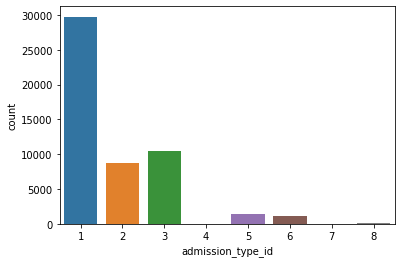

In [24]:
# admission type
# 1: Emergency, 2: Urgent, 3: Elective, 4: Newborn, 5: Not Available,
# 6: NULL, 7: Trauma Center, 8: Not Mapped

admit_type_plot = sns.countplot(data=df, x='admission_type_id')
plt.show()

# Majority admitted under Emergency

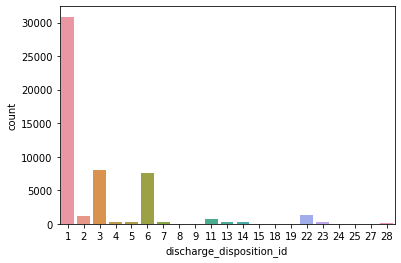

In [25]:
# discharge disposition
# 1: Discharged to home, 3: Discharged/transferred to SNF, 
# 6: Discharged/transferred to home with home health service

discharge_plot = sns.countplot(data=df, x='discharge_disposition_id')
plt.show()

# majority is discharged to home. followed by discharged/transferred to SNF and 
# discharged/transferred to home with home health service

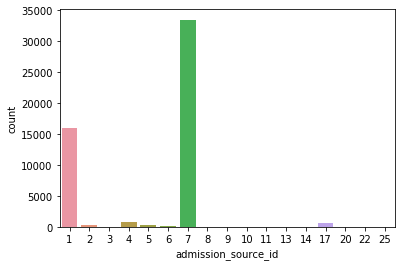

In [26]:
# admission source
admit_source_plot = sns.countplot(data=df, x='admission_source_id')
plt.show()

# 1: Physician Referral, 7: Emergency Room
# majority are admitted via emergency room, which co-incide with admission type

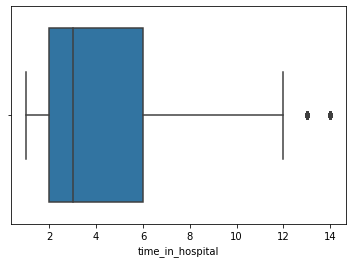

False    50789
True       977
Name: time_in_hospital, dtype: int64

In [27]:
# time in hospital
time_plot = sns.boxplot(df['time_in_hospital'])
plt.show()

# positive skewed. 75% majority is below 6 days. median of around 3 days. 
#  with outliers of 13 & 14 days

# 977 records are >3sd (1.89% of data)
time_in_hospital_outliers = (df['time_in_hospital'] > (4.237+2.870999*3)).value_counts()
time_in_hospital_outliers

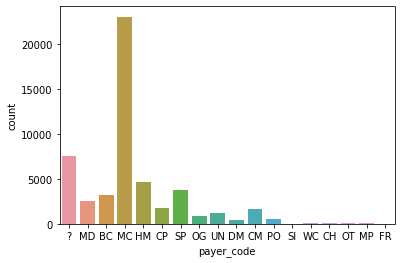

MC    23046
?      7601
HM     4702
SP     3808
BC     3165
MD     2537
CP     1801
CM     1696
UN     1192
OG      879
PO      511
DM      412
CH      127
WC      100
OT       83
MP       79
SI       26
FR        1
Name: payer_code, dtype: int64

In [28]:
# payer_code (Unique identifier assigned to each insurance company)

payer_code_plot = sns.countplot(data=df, x='payer_code')
plt.show()

df['payer_code'].value_counts()

# missing data with "?"  7601 (about 15% of total data!)
# majority is 'MC'

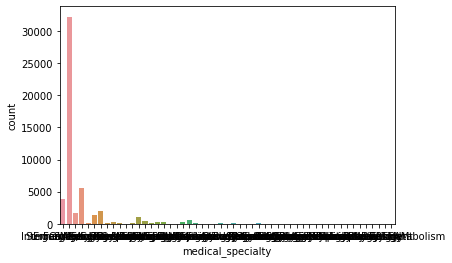

?                                    32203
Emergency/Trauma                      5616
InternalMedicine                      3854
Family/GeneralPractice                1949
Cardiology                            1667
Surgery-General                       1326
Radiologist                           1070
Orthopedics                            681
Nephrology                             468
Surgery-Vascular                       332
Gastroenterology                       297
Orthopedics-Reconstructive             286
Psychiatry                             244
Pulmonology                            211
Urology                                203
ObstetricsandGynecology                185
Oncology                               143
Neurology                              110
Surgery-Cardiovascular/Thoracic        105
Surgery-Neuro                           76
Podiatry                                72
Psychology                              64
Hematology                              59
Pediatrics 

In [29]:
# medical_specialty (Indicates specialty of the admitting physician,for example, cardiology, surgeon, etc.)

medical_specialty_plot = sns.countplot(data=df, x='medical_specialty')
plt.show()

df['medical_specialty'].value_counts()

# missing data with "?"  32203 (about 62% of total data!)
# majority is 'InternalMedicine'

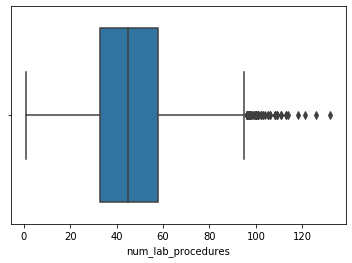

False    51746
True        20
Name: num_lab_procedures, dtype: int64

In [30]:
# number of lab procedures
lab_procedures_plot = sns.boxplot(df['num_lab_procedures'])
plt.show()

# Per statistic median>mean, it is -ive skewed . With outliers.
# 20 records are >3sd
lab_procedures_outliers = (df['num_lab_procedures'] > (43.853205+19.945471*3)).value_counts()
lab_procedures_outliers

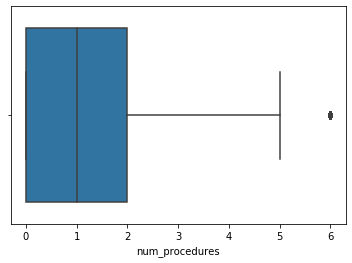

False    48893
True      2873
Name: num_procedures, dtype: int64

In [31]:
# number of procedures (other than lab procedures)
no_procedures_plot = sns.boxplot(df['num_procedures'])
plt.show()

# positive skewed with outlier. Median is 1.
# 2873 records are >3sd (5.55%)
num_procedures_outliers = (df['num_procedures'] == 6).value_counts()
num_procedures_outliers

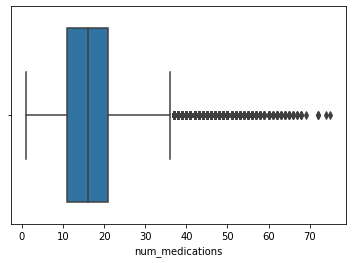

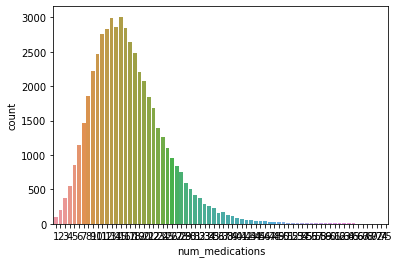

False    51140
True       626
Name: num_medications, dtype: int64

In [32]:
# number of medications
no_medications_plot = sns.boxplot(df['num_medications'])
plt.show()

no_medications_countplot = sns.countplot(data=df, x='num_medications')
plt.show()

# positive skewed. Median of 15
# 626 records are >3sd (1.21% of data)
no_medications_outliers = (df['num_medications'] > (16.735850+8.063522*3)).value_counts()
no_medications_outliers

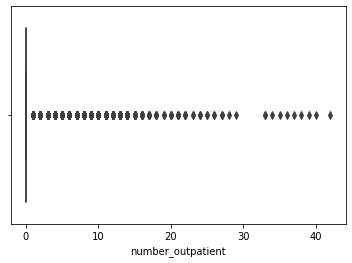

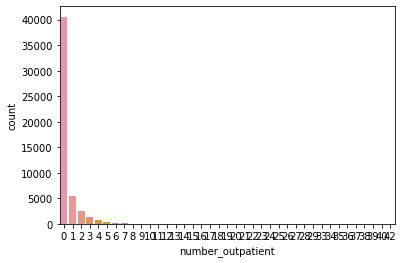

False    51029
True       737
Name: number_outpatient, dtype: int64

In [33]:
# Number of outpatient visits of the patient in the year preceding the encounter
no_outpatient_plot = sns.boxplot(df['number_outpatient'])
plt.show()

no_outpatient_count = sns.countplot(data=df, x='number_outpatient')
plt.show()

# positive skewed. Majority is 0. With outliers
# 737 records are >3sd (1.42% of data)
number_outpatient_outliers = (df['number_outpatient'] > (0.512846+1.544866*3)).value_counts()
number_outpatient_outliers

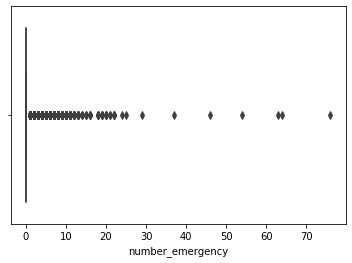

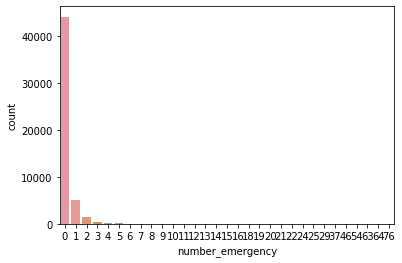

False    51099
True       667
Name: number_emergency, dtype: int64

In [34]:
# Number of emergency visits of the patient in the year preceding the encounter
no_outpatient_plot = sns.boxplot(df['number_emergency'])
plt.show()

no_outpatient_count = sns.countplot(data=df, x='number_emergency')
plt.show()

# positive skewed. Majority is 0 with outliers
# 667 records are >3sd (1.29% of data)
number_emergency_outliers = (df['number_emergency'] > (0.269173+1.146923*3)).value_counts()
number_emergency_outliers

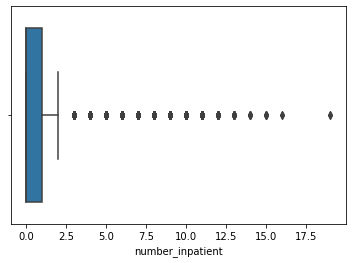

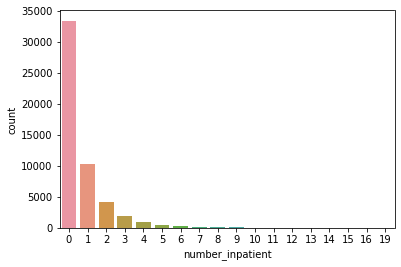

False    50620
True      1146
Name: number_inpatient, dtype: int64

In [35]:
# Number of inpatient visits of the patient in the year preceding the encounter
no_outpatient_plot = sns.boxplot(df['number_inpatient'])
plt.show()

no_outpatient_count = sns.countplot(data=df, x='number_inpatient')
plt.show()

# positive skewed. Majority is 0 with outliers
# 1146 records are >3sd (2.21% of data)
number_inpatient_outliers = (df['number_inpatient'] > (0.686879+1.320968*3)).value_counts()
number_inpatient_outliers

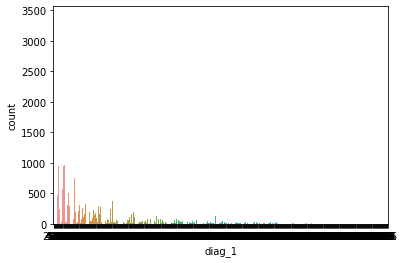

428       3395
414       2746
486       1808
786       1747
410       1626
427       1502
491       1432
715       1219
682       1075
780       1059
38        1012
434       1004
584        965
599        963
250.8      949
996        946
276        941
518        752
493        603
250.6      579
820        577
562        535
577        519
574        499
435        499
560        481
296        473
V57        458
250.7      386
250.13     385
          ... 
V51          1
990          1
871          1
957          1
194          1
684          1
133          1
246          1
229          1
690          1
384          1
412          1
250.53       1
501          1
895          1
734          1
314          1
523          1
653          1
261          1
381          1
E909         1
936          1
149          1
694          1
759          1
131          1
526          1
579          1
832          1
Name: diag_1, Length: 649, dtype: int64

In [36]:
# diag_1 (primary diagnosis), in accordance with first three digits of ICD9
diag_1_count = sns.countplot(data=df, x='diag_1')
plt.show()

# majority is '428' (Congestive heart failure, unspecified) and 
#  '414' (Other forms of chronic ischemic heart disease)
#  there are 649 types of diagnosis
df['diag_1'].value_counts()

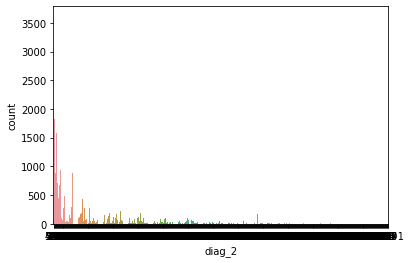

276       3604
428       3177
250       2685
427       2536
599       1826
401       1705
496       1578
585       1569
414       1285
403       1267
584       1158
250.02    1061
707       1036
285        947
411        944
491        883
486        880
518        806
682        746
780        718
425        681
424        490
413        451
493        441
786        345
305        345
250.6      333
410        295
785        293
998        273
          ... 
179          1
610          1
E968         1
341          1
347          1
388          1
607          1
316          1
140          1
306          1
145          1
E826         1
661          1
994          1
634          1
96           1
967          1
217          1
350          1
748          1
250.91       1
192          1
E933         1
V11          1
11           1
528          1
523          1
871          1
814          1
460          1
Name: diag_2, Length: 683, dtype: int64

In [37]:
# diag_2 (secondary diagnosis), in accordance with first three digits of ICD9
diag_2_count = sns.countplot(data=df, x='diag_2')
plt.show()

# majority is '276' (Hyperosmolality and/or hypernatremia) and 
#  '428' (Congestive heart failure, unspecified)
#   there are 683 types of diagnosis
df['diag_2'].value_counts()

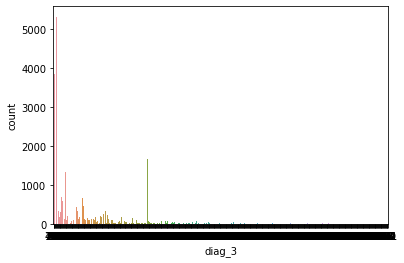

250       5323
401       3861
276       2968
428       2370
427       2016
414       1748
585       1679
403       1331
496       1312
599       1060
272       1017
250.02     775
285        683
707        683
780        659
V45        591
425        585
584        544
682        507
424        473
518        472
305        445
250.6      442
V58        376
41         345
491        344
?          340
278        338
493        327
786        321
          ... 
506          1
695          1
E905         1
690          1
226          1
E966         1
384          1
14           1
684          1
750          1
735          1
852          1
463          1
955          1
538          1
460          1
250.31       1
701          1
842          1
V01          1
216          1
E864         1
370          1
956          1
880          1
945          1
879          1
597          1
864          1
175          1
Name: diag_3, Length: 726, dtype: int64

In [38]:
# diag_3 (additional secondary)), in accordance with first three digits of ICD9

diag_3_count = sns.countplot(data=df, x='diag_3')
plt.show()

# majority is '250' (Diabetes), '401' (Malignant essential hypertension)
# there are 726 types of diagnosis
df['diag_3'].value_counts()

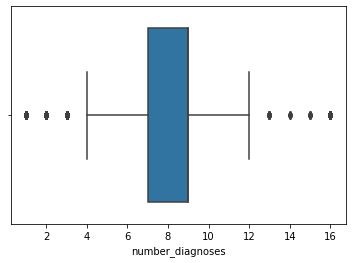

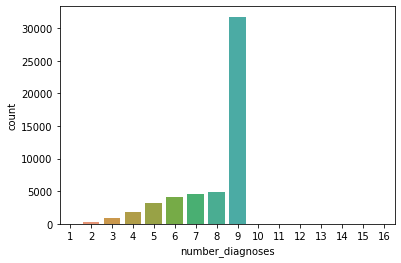

False    51462
True       304
Name: number_diagnoses, dtype: int64

In [39]:
# Number of diagnoses entered to the system
no_diagnoses_plot = sns.boxplot(df['number_diagnoses'])
plt.show()

no_diagnoses_count = sns.countplot(data=df, x='number_diagnoses')
plt.show()

# mean = 7.928485878762122, median = 0, median > mean ==> negative skewed
# outliers on both sides

# 62 records are >3sd  and 304 records are <-3sd (0.71% of data)
number_diagnoses_outliers = (df['number_diagnoses'] > (7.928485878762122+1.693707*3)).value_counts()
number_diagnoses_outliers

number_diagnoses_outliers = (df['number_diagnoses'] < (7.928485878762122-1.693707*3)).value_counts()
number_diagnoses_outliers

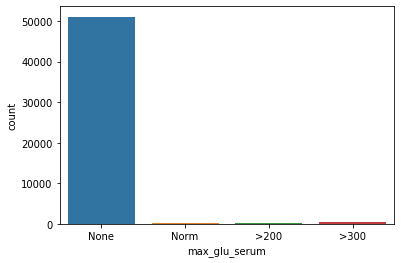

In [40]:
# Glucose serum test result. 
#  Indicates the range of the result or if the test was not taken(“none”)
max_glu_serum_count = sns.countplot(data=df, x='max_glu_serum')
plt.show()

# majority are None

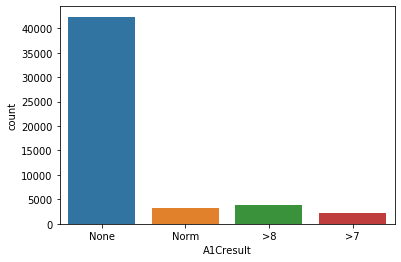

In [41]:
# A1c test result.

# Values include:‘>8’ if the result was greater than 8%, 
# “>7” if the result was greater than 7% but less than 8%, 
# “normal” if the result was less than 7%, and 
# “none” if not measured

A1Cresult_count = sns.countplot(data=df, x='A1Cresult')
plt.show()

# Majority are None.

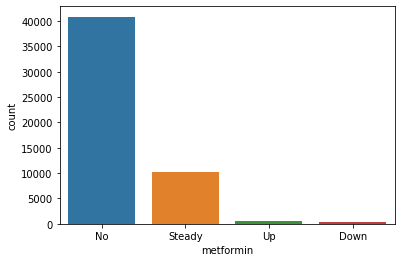

In [42]:
# metformin

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

metformin_count = sns.countplot(data=df, x='metformin')
plt.show()

# majority are not prescribed

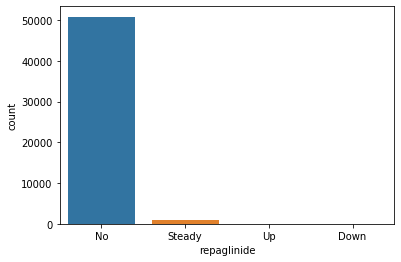

In [43]:
# repaglinide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

repaglinide_count = sns.countplot(data=df, x='repaglinide')
plt.show()

# majority are not prescribed

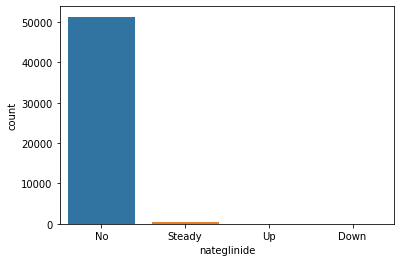

In [44]:
# nateglinide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

nateglinide_count = sns.countplot(data=df, x='nateglinide')
plt.show()

# majority are not prescribed

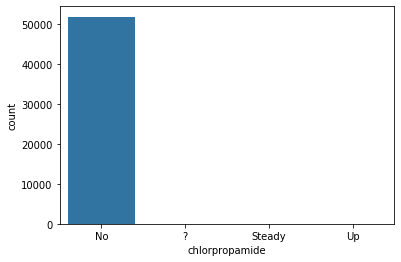

In [45]:
# chlorpropamide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

chlorpropamide_count = sns.countplot(data=df, x='chlorpropamide')
plt.show()

# there is '?' values
# majority are not prescribed

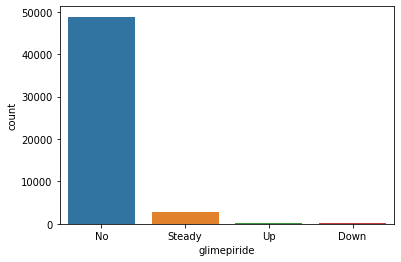

In [46]:
# glimepiride

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

glimepiride_count = sns.countplot(data=df, x='glimepiride')
plt.show()

# majority are not prescribed

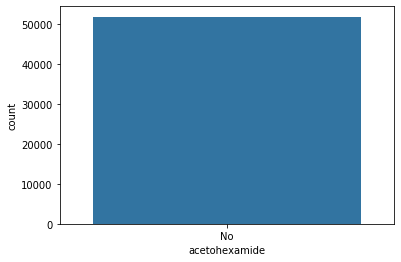

In [47]:
# acetohexamide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

acetohexamide_count = sns.countplot(data=df, x='acetohexamide')
plt.show()

# NO patient is prescribed to it

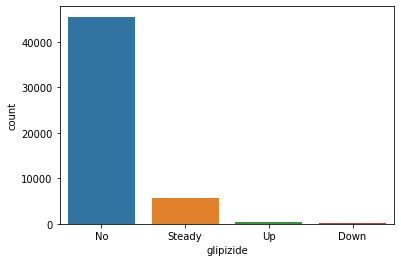

In [48]:
# glipizide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

glipizide_count = sns.countplot(data=df, x='glipizide')
plt.show()

# majority are not prescribed

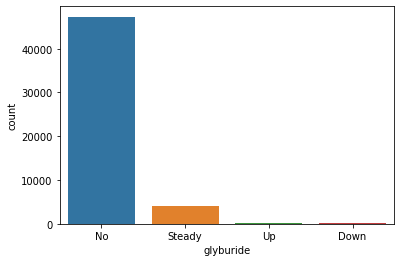

In [49]:
# glyburide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

glyburide_count = sns.countplot(data=df, x='glyburide')
plt.show()

# majority are not prescribed

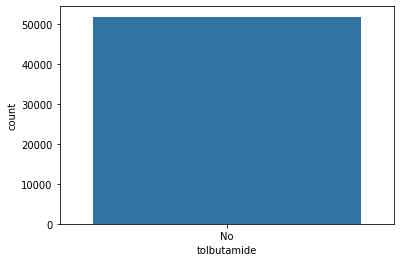

In [50]:
# tolbutamide

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

tolbutamide_count = sns.countplot(data=df, x='tolbutamide')
plt.show()

# NO patient is prescribed to it

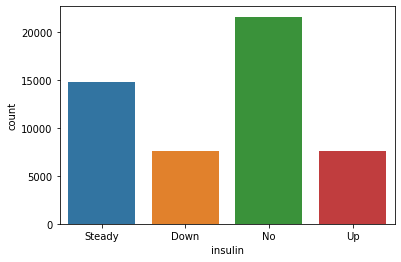

In [51]:
# insulin

# A diabetes medications 
# The values of these variables indicate whether the drug was prescribed or there was a change in the dosage.
# "up” if the dosage was increased during the encounter, 
# “down” if the dosage was decreased, 
# “steady” if the dosage did not change, and 
# “no” if the drug was not prescribed.

insulin_count = sns.countplot(data=df, x='insulin')
plt.show()

# Good number of patients are on insulin

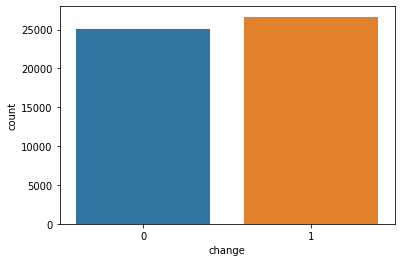

In [52]:
# Change of medications
# Indicates if there was a change in diabetic medications (either dosage or generic name)
# 1: “change”and 0: “no change"

change_count = sns.countplot(data=df, x='change')
plt.show()

# roughly similiar

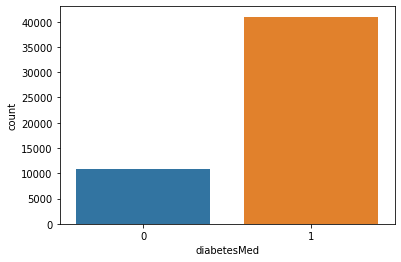

In [53]:
# Diabetes medications
# Indicates if there was any diabetic medication prescribed
# 1: “yes” and 0: “no”

diabetesMed_count = sns.countplot(data=df, x='diabetesMed')
plt.show()

# majority are not on diabetes medications

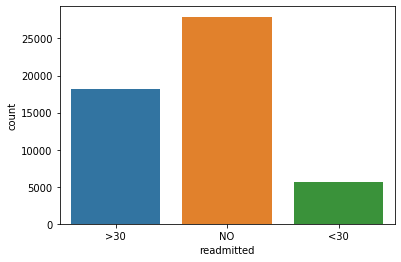

In [54]:
# Days to inpatient readmission. 
# “<30” if the patient was readmitted in less than 30 days, 
# “>30” if the patient was readmitted in more than 30 days, and 
# “No” for no record of readmission.

readmitted_count = sns.countplot(data=df, x='readmitted')
plt.show()

# many are readmitted, majority of which are readmitted >30 days

In [55]:
df_process = df

In [56]:
# check to see how many unique values in diag_1
diag1_unique = len(pd.unique(df_process['diag_1']))
diag1_unique

649

In [57]:
# check to see how many unique values in diag_2
diag2_unique = len(pd.unique(df_process['diag_2']))
diag2_unique

683

In [58]:
# check to see how many unique values in diag_3
diag3_unique = len(pd.unique(df_process['diag_3']))
diag3_unique

726

In [59]:
# create derived variables for diag_1, diag_2, diag_3 for their top two diagnoses 

# For diag_1
# create new column for diag_1 with '428' diagnosis (Congestive heart failure, unspecified)
df_process['diag1_428'] = df_process['diag_1'].apply(lambda x: 1 if x == '428' else 0)

# create new column for diag_1 with '414' diagnosis(Other forms of chronic ischemic heart disease)
df_process['diag1_414'] = df_process['diag_1'].apply(lambda x: 1 if x == '414' else 0)



# For diag_2
# create new column for diag_2 with '276' diagnosis(Hyperosmolality and/or hypernatremia)
df_process['diag2_276'] = df_process['diag_2'].apply(lambda x: 1 if x == '276' else 0)

# create new column for diag_2 with '428' diagnosis(Congestive heart failure, unspecified)
df_process['diag2_428'] = df_process['diag_2'].apply(lambda x: 1 if x == '428' else 0)



# For diag_3
# create new column for diag_3 with '250' diagnosis(Diabetes)
df_process['diag3_250'] = df_process['diag_3'].apply(lambda x: 1 if x == '250' else 0)

# create new column for diag_3 with '401' diagnosis(Malignant essential hypertension)
df_process['diag3_401'] = df_process['diag_3'].apply(lambda x: 1 if x == '401' else 0)


In [60]:
### Pre-process data


# Drop columns : encounter_id, patient_nbr, payer_code, medical_specialty
df_process = df_process.drop(['encounter_id', 'patient_nbr', 'payer_code', 
                              'medical_specialty'], axis=1)

# Drop rows : age with ? (10 records)
df_process = df_process[df_process.age != '?']

# Drop rows : chlorpropamide (9 records)
df_process = df_process[df_process.chlorpropamide != '?']

# Drop rows : gender (4 records)  (NaN)
df_process = df_process.dropna(how='any', subset=['gender'])

# Race - replace "?" to nan
df_process['race'] = df_process['race'].replace(['?'],np.NaN)

# Impute missing weight values using mode
df_process['weight'] = df_process['weight'].replace(['?'],np.NaN)
stats.mode(df_process['weight'])
# replace NaN weight with mode '[75-100)'
df_process['weight'] = df_process['weight'].replace(np.NaN, '[75-100)')

# Dropping other variables in df_process
df_process = df_process.drop(['diag_1', 'diag_2', 'diag_3', 
                                      'max_glu_serum', 'A1Cresult', 
                                      'metformin', 'repaglinide', 'nateglinide', 
                                      'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                                      'glyburide', 'tolbutamide'], axis=1)

df_process

C:\Users\datas\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,change,diabetesMed,readmitted,diag1_428,diag1_414,diag2_276,diag2_428,diag3_250,diag3_401
0,Caucasian,0.0,[60-70),[75-100),2,1,1,4,43,0,...,Steady,0,1,>30,1,0,0,0,0,0
1,Caucasian,0.0,[80-90),[75-100),3,2,1,8,48,6,...,Down,1,1,>30,0,1,0,0,0,0
2,Caucasian,0.0,[80-90),[75-100),2,1,1,2,39,0,...,No,0,0,NO,0,0,0,0,0,1
3,Caucasian,0.0,[60-70),[75-100),3,1,1,2,54,0,...,No,0,0,NO,0,0,0,0,0,0
4,Caucasian,0.0,[60-70),[75-100),3,2,1,7,70,1,...,Down,1,1,>30,0,0,0,0,0,0
5,Caucasian,1.0,[70-80),[75-100),2,1,7,3,1,4,...,Steady,0,1,NO,0,0,0,0,0,0
6,Caucasian,1.0,[60-70),[75-100),2,1,1,6,28,1,...,Up,1,1,NO,0,0,0,0,0,1
7,AfricanAmerican,0.0,[40-50),[75-100),1,1,7,3,48,0,...,Down,1,1,NO,0,0,0,0,1,0
8,AfricanAmerican,1.0,[70-80),[75-100),1,1,7,5,42,2,...,No,0,1,<30,0,0,0,0,0,0
9,AfricanAmerican,0.0,[70-80),[75-100),1,1,7,1,43,1,...,Up,1,1,>30,0,0,0,0,0,0


In [61]:
# create csv file after pre-processing

df_process.to_csv('D1-processed.csv')

# One hot encoding - dummies

In [62]:
# one hot encoding - dummies 

df_dummy = pd.get_dummies(df_process)
df_dummy

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,weight_[25-50),weight_[50-75),weight_[75-100),insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted_<30,readmitted_>30,readmitted_NO
0,0.0,2,1,1,4,43,0,13,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0.0,3,2,1,8,48,6,26,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0.0,2,1,1,2,39,0,9,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0.0,3,1,1,2,54,0,11,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,3,2,1,7,70,1,20,1,0,...,0,0,1,1,0,0,0,0,1,0
5,1.0,2,1,7,3,1,4,7,0,0,...,0,0,1,0,0,1,0,0,0,1
6,1.0,2,1,1,6,28,1,20,0,0,...,0,0,1,0,0,0,1,0,0,1
7,0.0,1,1,7,3,48,0,18,0,0,...,0,0,1,1,0,0,0,0,0,1
8,1.0,1,1,7,5,42,2,12,0,0,...,0,0,1,0,1,0,0,1,0,0
9,0.0,1,1,7,1,43,1,5,0,2,...,0,0,1,0,0,0,1,0,1,0


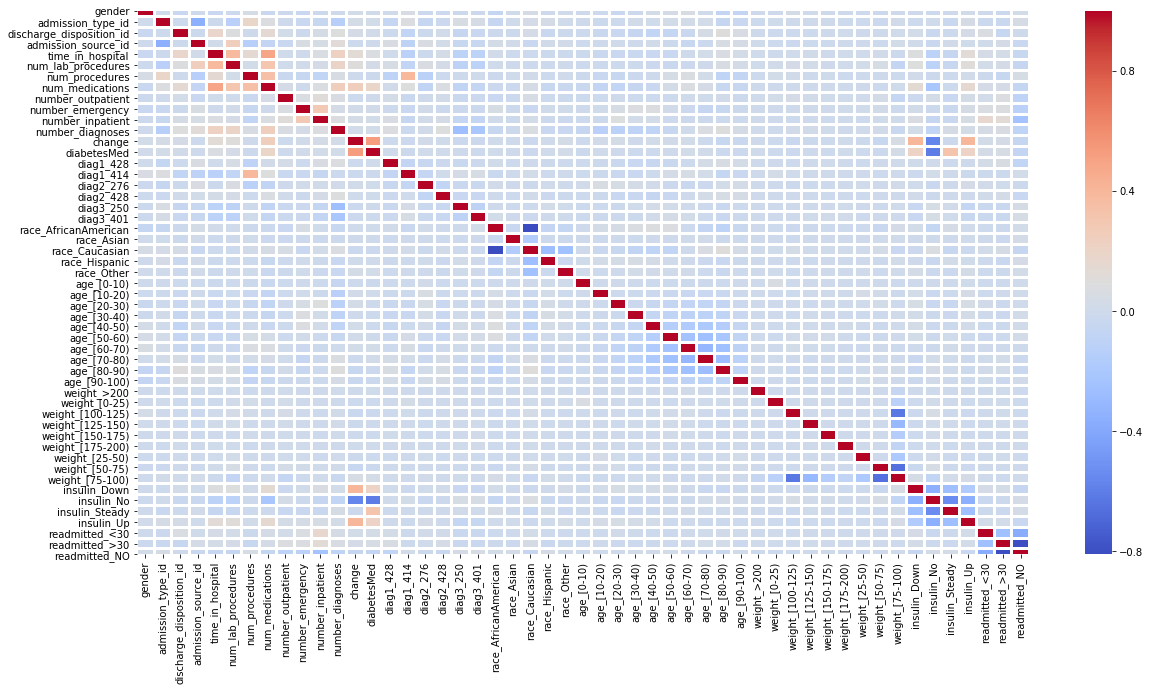

In [63]:
# identify highly correlated variable pairs and elaborate on how to treat these variables in the mining process

plt.figure(figsize=(20, 10))
correlation = df_dummy.corr()
ax = sns.heatmap(data=correlation, cmap='coolwarm', linewidths=2, cbar=True)


In [64]:
# What is the correlation b/w race_AfricanAmerican and race_Caucasian
race_corr=pd.DataFrame(df_dummy, columns=['race_AfricanAmerican', 'race_Caucasian'])
race_corr.corr(method='spearman')


,race_AfricanAmerican,race_Caucasian
race_AfricanAmerican,1.000000,-0.810038
race_Caucasian,-0.810038,1.000000


In [65]:
# What is the correlation b/w readmitted_>30 and readmitted_NO
readmitted_corr=pd.DataFrame(df_dummy, columns=['readmitted_>30', 'readmitted_NO'])
readmitted_corr.corr(method='spearman')


,readmitted_>30,readmitted_NO
readmitted_>30,1.000000,-0.797729
readmitted_NO,-0.797729,1.000000


### Q3(2) Relationship between num_medications (numeric) and readmitted (categorical)

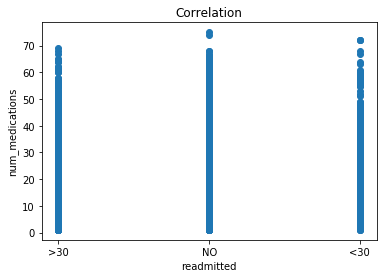

In [66]:
# Q3(2) Relationship between num_medications and readmitted
plt.scatter(df['readmitted'], df['num_medications'])
plt.title('Correlation')
plt.xlabel('readmitted')
plt.ylabel('num_medications')
plt.show()

In [67]:
# Q3(2) Relationship between num_medications (numeric) and readmitted (categorical)
# Low correlation of 0.067557

cat_map={">30":2, "<30":1, "NO":0}
df2=df
df2['readmitted']=df2['readmitted'].map(cat_map)
df1=pd.DataFrame(df2, columns=['readmitted', 'num_medications'])
df1.corr(method='spearman')

,readmitted,num_medications
readmitted,1.000000,0.067557
num_medications,0.067557,1.000000
